Задание 2. Используя определение, оценить сложность по радемахеру для логистической регресии на breast cancer dataset из scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики. Построить график зависимости сложности по радемахеру от коэф L2 регуляризации для alpha=np.logspace(-2,2,5). Для каждой точки выполнить 100 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке. Не забудьте предварительно применить к признакам standard scaling.

In [1]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import random


from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_breast_cancer()

In [4]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [45]:
def get_data(data):
    X = data.data
    y = data.target
    stan = StandardScaler()
    X = stan.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random.randint(1, 1000))
    
    return (X_train, X_test, y_train, y_test)

In [40]:
def get_logreg(X_train, y_train, alpha):
    seed = random.randint(1, 1000)
    sigma = np.random.choice([-1,1], size=y_train.shape[0]) #np.array?
    #sigma = np.array([-1] * int(len(y_train)/2) + [1] * int(len(y_train) / 2))
    clf = LogisticRegression(C=alpha, penalty='l2')
    clf.fit(X_train, sigma)
    return (sigma*clf.decision_function(X_train)) #нужно сделать np.average()

In [48]:
m_rdm = []
std_rdm = []
for alpha in np.logspace(-2, 2, 5):
    asd = []
    for n in tqdm(range(100)):
        X_train, X_test, y_train, y_test = get_data(data)
        som_res = get_logreg(X_train, y_train, alpha)
        asd.append(np.average(som_res))
    m_rdm.append(np.mean(asd)) #sum -> mean
    std_rdm.append(np.std(asd))

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [23]:
m_rdm

[3.4636474459452193,
 4.680250622261916,
 6.3354184505749345,
 7.891024026610122,
 10.45087994399082]

In [24]:
std_rdm

[0.01969347713446309,
 0.022212061478490988,
 0.023666047752344193,
 0.025819708735402548,
 0.030849126024270455]

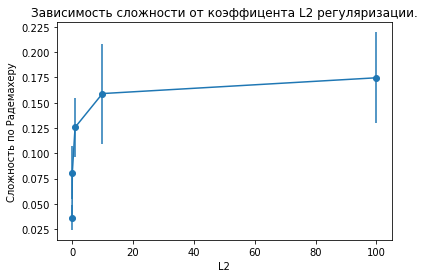

In [49]:
plt.errorbar(np.logspace(-2, 2, 5), m_rdm, std_rdm, fmt='-o')
plt.title('Зависимость сложности от коэффицента L2 регуляризации.')
plt.xlabel('L2')
plt.ylabel('Сложность по Радемахеру');